### Individual Homework

#### Enter your name here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [2]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [5]:
movies.groupby("genre").agg(count=("title", "count")).sort_values(by="count", ascending=False)

,count
genre,
Comedy,848
Action,738
Drama,498
Adventure,288
Crime,202
Biography,135
Horror,131
Animation,35
Fantasy,28


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [11]:
# 2) Avg gross & budget by genre + return_on_budget (descending by ROI)
gvb = movies.groupby("genre").agg(
    avg_gross=("gross", "mean"),
    avg_budget=("budget", "mean")
)
gvb.assign(return_on_budget = gvb["avg_gross"] / gvb["avg_budget"]).sort_values("return_on_budget", ascending=False)


,avg_gross,avg_budget,return_on_budget
genre,,,
Musical,9.208400e+07,3.189500e+06,28.870983
Family,1.491605e+08,1.483333e+07,10.055763
Western,2.082188e+07,3.465000e+06,6.009202
Documentary,1.735397e+07,5.887852e+06,2.947420
Horror,3.771374e+07,1.350492e+07,2.792593
Fantasy,4.240884e+07,1.758214e+07,2.412040
Comedy,4.263055e+07,2.444632e+07,1.743843
Mystery,6.753302e+07,3.921875e+07,1.721958
Animation,9.843379e+07,6.170143e+07,1.595324


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [12]:
movies.groupby("director")["gross"].agg(
    ["sum", "mean", "median","std"]
).sort_values(by="sum", ascending=False).head(15)

,sum,mean,median,std
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [75]:
movies.groupby("genre")["rating"].agg(["mean", "min", "max", "median", "std","count"]).sort_values("mean", ascending=False)


,mean,min,max,median,std,count
genre,,,,,,
Biography,7.114074,4.5,8.9,7.20,0.759827,135
Crime,6.915347,4.8,9.3,6.90,0.849356,202
Mystery,6.856250,4.6,8.5,6.90,0.881641,16
Musical,6.750000,6.3,7.2,6.75,0.636396,2
Drama,6.731526,2.1,8.8,6.80,0.916993,498
Documentary,6.660000,1.6,8.5,7.40,1.766588,25
Sci-Fi,6.657143,5.0,8.2,6.40,1.093705,7
Animation,6.651429,4.5,8.0,6.90,0.968131,35
Romance,6.650000,6.2,7.1,6.65,0.636396,2


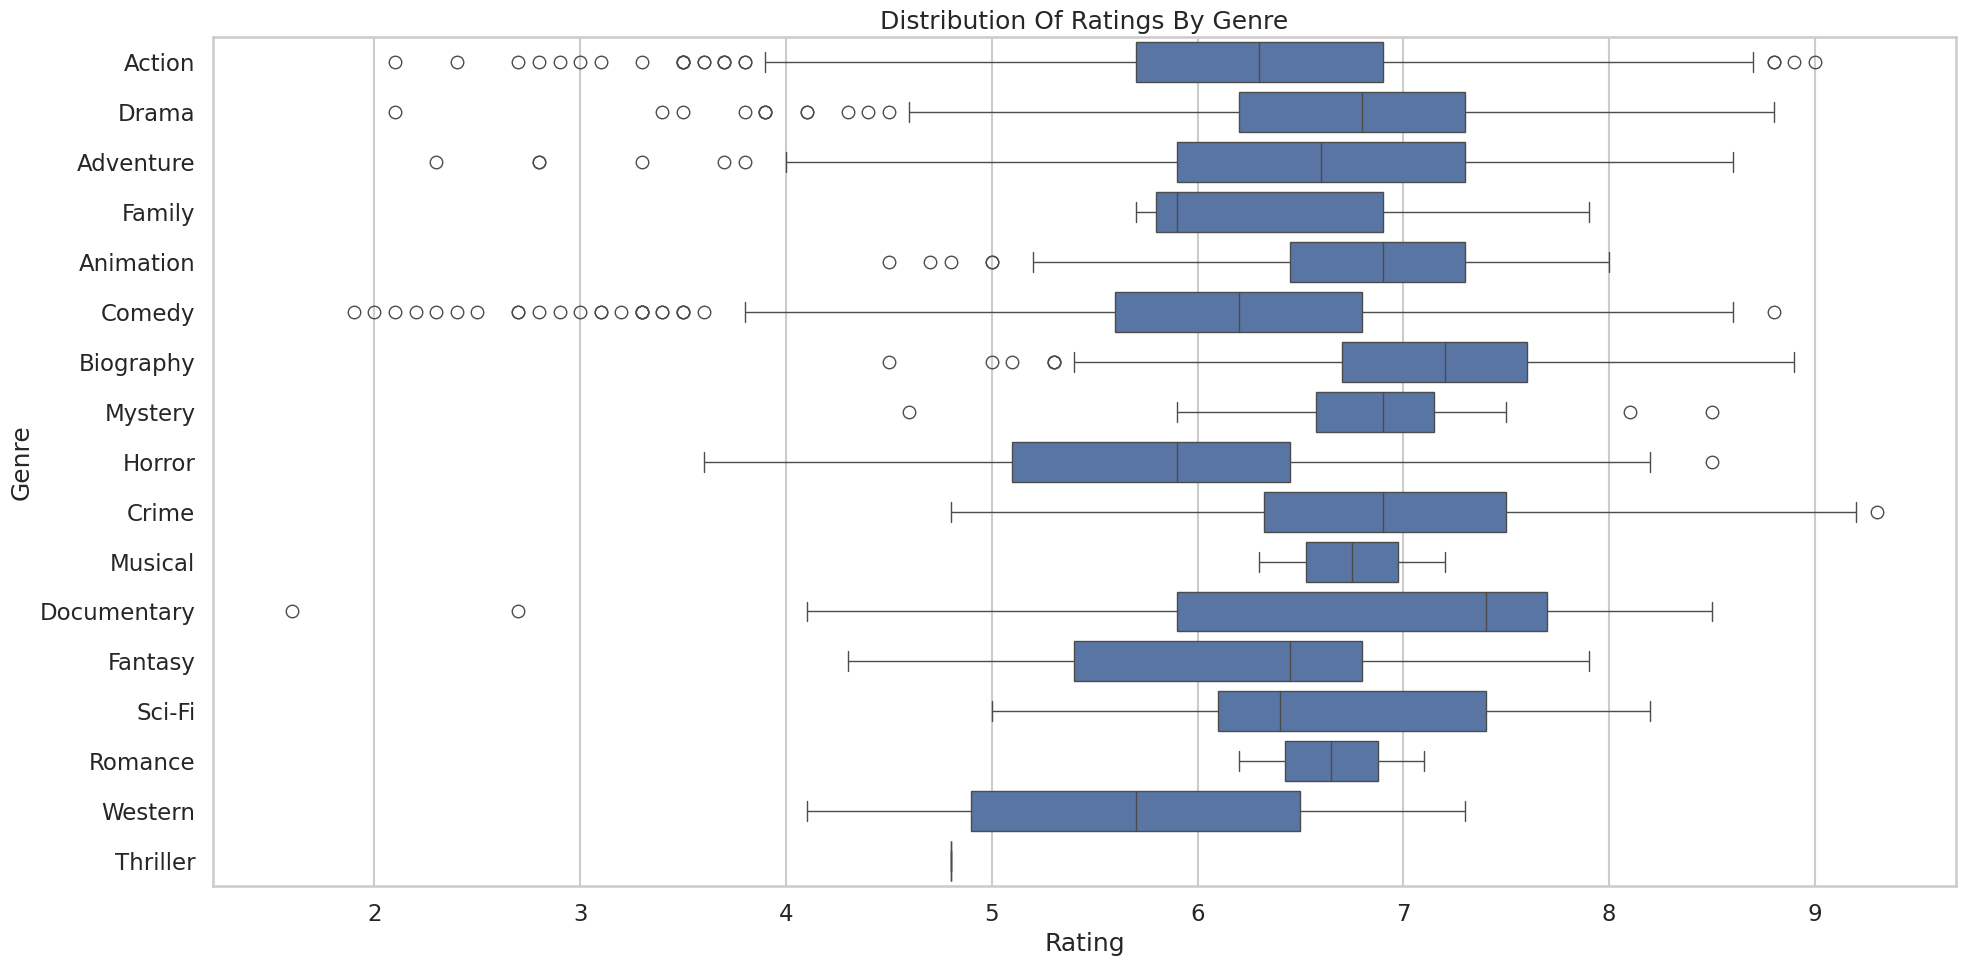

In [78]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=movies, x="rating", y="genre")
plt.title("Distribution Of Ratings By Genre")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [12]:
# Challenge table example: decade overview (count, median ROI, mean rating)
mov2 = movies.assign(
    decade=(movies["year"] // 10) * 10,
    roi=np.where(movies["budget"] > 0, movies["gross"] / movies["budget"], np.nan)
)
mov2.groupby("decade").agg(
    movies_count=("title", "count"),
    median_roi=("roi", "median"),
    mean_rating=("rating", "mean")
).sort_index()


,movies_count,median_roi,mean_rating
decade,,,
1920,2,18.704485,5.550000
1930,6,6.584342,8.016667
1940,5,2.550000,7.460000
1950,6,8.834486,7.283333
1960,10,8.715773,7.690000
1970,37,22.470325,7.405405
1980,176,3.066765,6.674432
1990,602,1.250707,6.509302
2000,1326,1.061377,6.253318


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

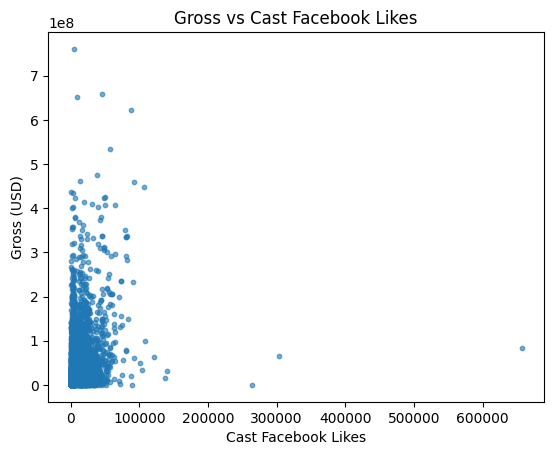

In [13]:
# Visualization Q1: gross vs cast_facebook_likes (X: likes, Y: gross)
plt.figure()
plt.scatter(movies["cast_facebook_likes"], movies["gross"], s=10, alpha=0.6)
plt.xlabel("Cast Facebook Likes"); plt.ylabel("Gross (USD)"); plt.title("Gross vs Cast Facebook Likes")
plt.show()


**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

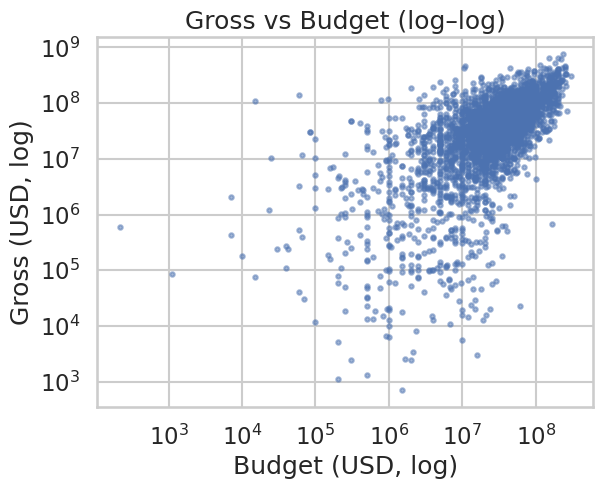

In [90]:
# Visualization Q2: gross vs budget (log–log)
plt.figure()
plt.scatter(movies["budget"], movies["gross"], s=10, alpha=0.5)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Budget (USD, log)"); plt.ylabel("Gross (USD, log)"); plt.title("Gross vs Budget (log–log)")
plt.show()


**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

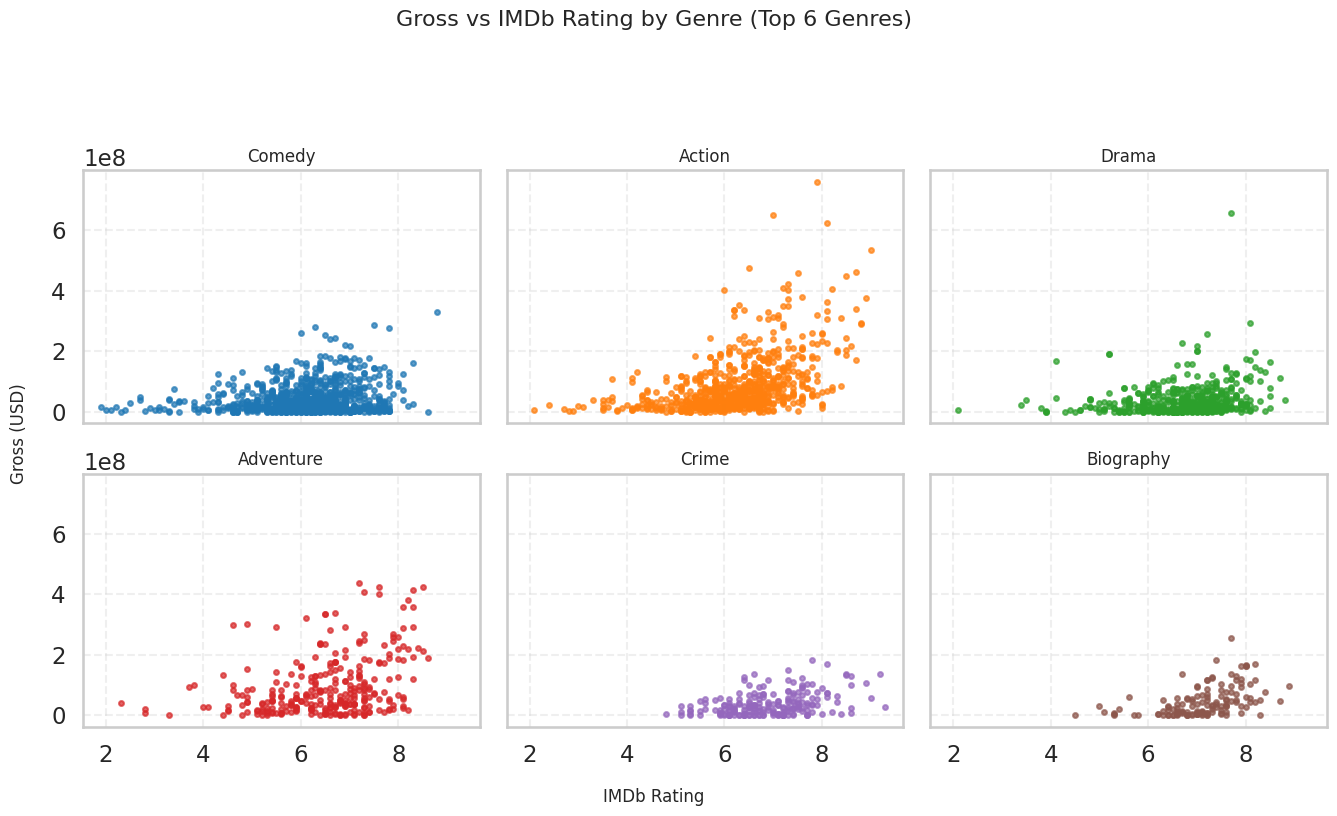

In [92]:
# Visualization Q3: gross vs rating, faceted by genre (top 6 by count)
top6 = movies["genre"].value_counts().head(6).index
sub = movies[movies["genre"].isin(top6)].copy()

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, g in enumerate(top6):
    tmp = sub[sub["genre"] == g]
    axes[i].scatter(
        tmp["rating"], tmp["gross"],
        s=12, alpha=0.7,
        color=sns.color_palette("tab10")[i]
    )
    axes[i].set_title(g, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.3)

# Common labels
fig.text(0.5, 0.04, "IMDb Rating", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Gross (USD)", va="center", rotation="vertical", fontsize=12)

# Super title
fig.suptitle("Gross vs IMDb Rating by Genre (Top 6 Genres)", fontsize=16, y=1.03)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

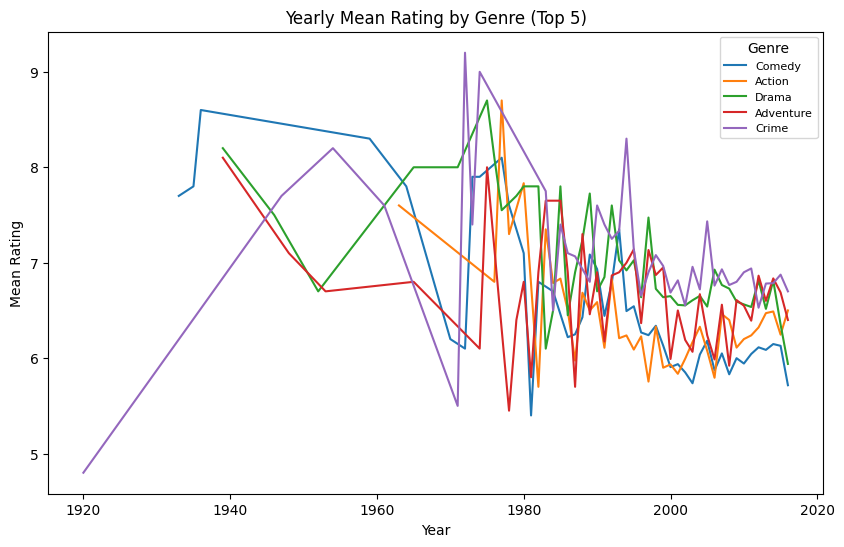

In [16]:
# Challenge viz example: yearly mean rating by top 5 genres
top5 = movies["genre"].value_counts().head(5).index
yr = (movies[movies["genre"].isin(top5)]
      .groupby(["year", "genre"])["rating"]
      .mean().reset_index().sort_values(["genre", "year"]))

plt.figure(figsize=(10, 6))
for g in top5:
    seg = yr[yr["genre"] == g]
    plt.plot(seg["year"], seg["rating"], label=g, linewidth=1.5)
plt.xlabel("Year"); plt.ylabel("Mean Rating"); plt.title("Yearly Mean Rating by Genre (Top 5)")
plt.legend(title="Genre", fontsize=8)
plt.show()


### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.